In [1]:
import xarray as xr
import numpy as np
import functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
rpath = '/nird/projects/NS9600K/astridbg/arctic-cld-feedbacks/data/'
ds_piClim = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_20250529.dynamics.cam.concatfiles.nc')
ds_2xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_2xCO2_20250529.dynamics.cam.concatfiles.nc')
ds_4xCO2 = xr.open_dataset(rpath+'N1850_f19_tn14_noresm2_3_slf_output_4xCO2_20250529.dynamics.cam.concatfiles.nc')

In [3]:
# Fix time stamp
ds_piClim = functions.fix_cam_time(ds_piClim)
ds_2xCO2 = functions.fix_cam_time(ds_2xCO2)
ds_4xCO2 = functions.fix_cam_time(ds_4xCO2)

In regrid_to_pressure atf.function. Regridding OMEGA to pressure levels
In regrid_to_pressure atf.function. Regridding OMEGA to pressure levels


Text(0.5, 0, 'hPa/day')

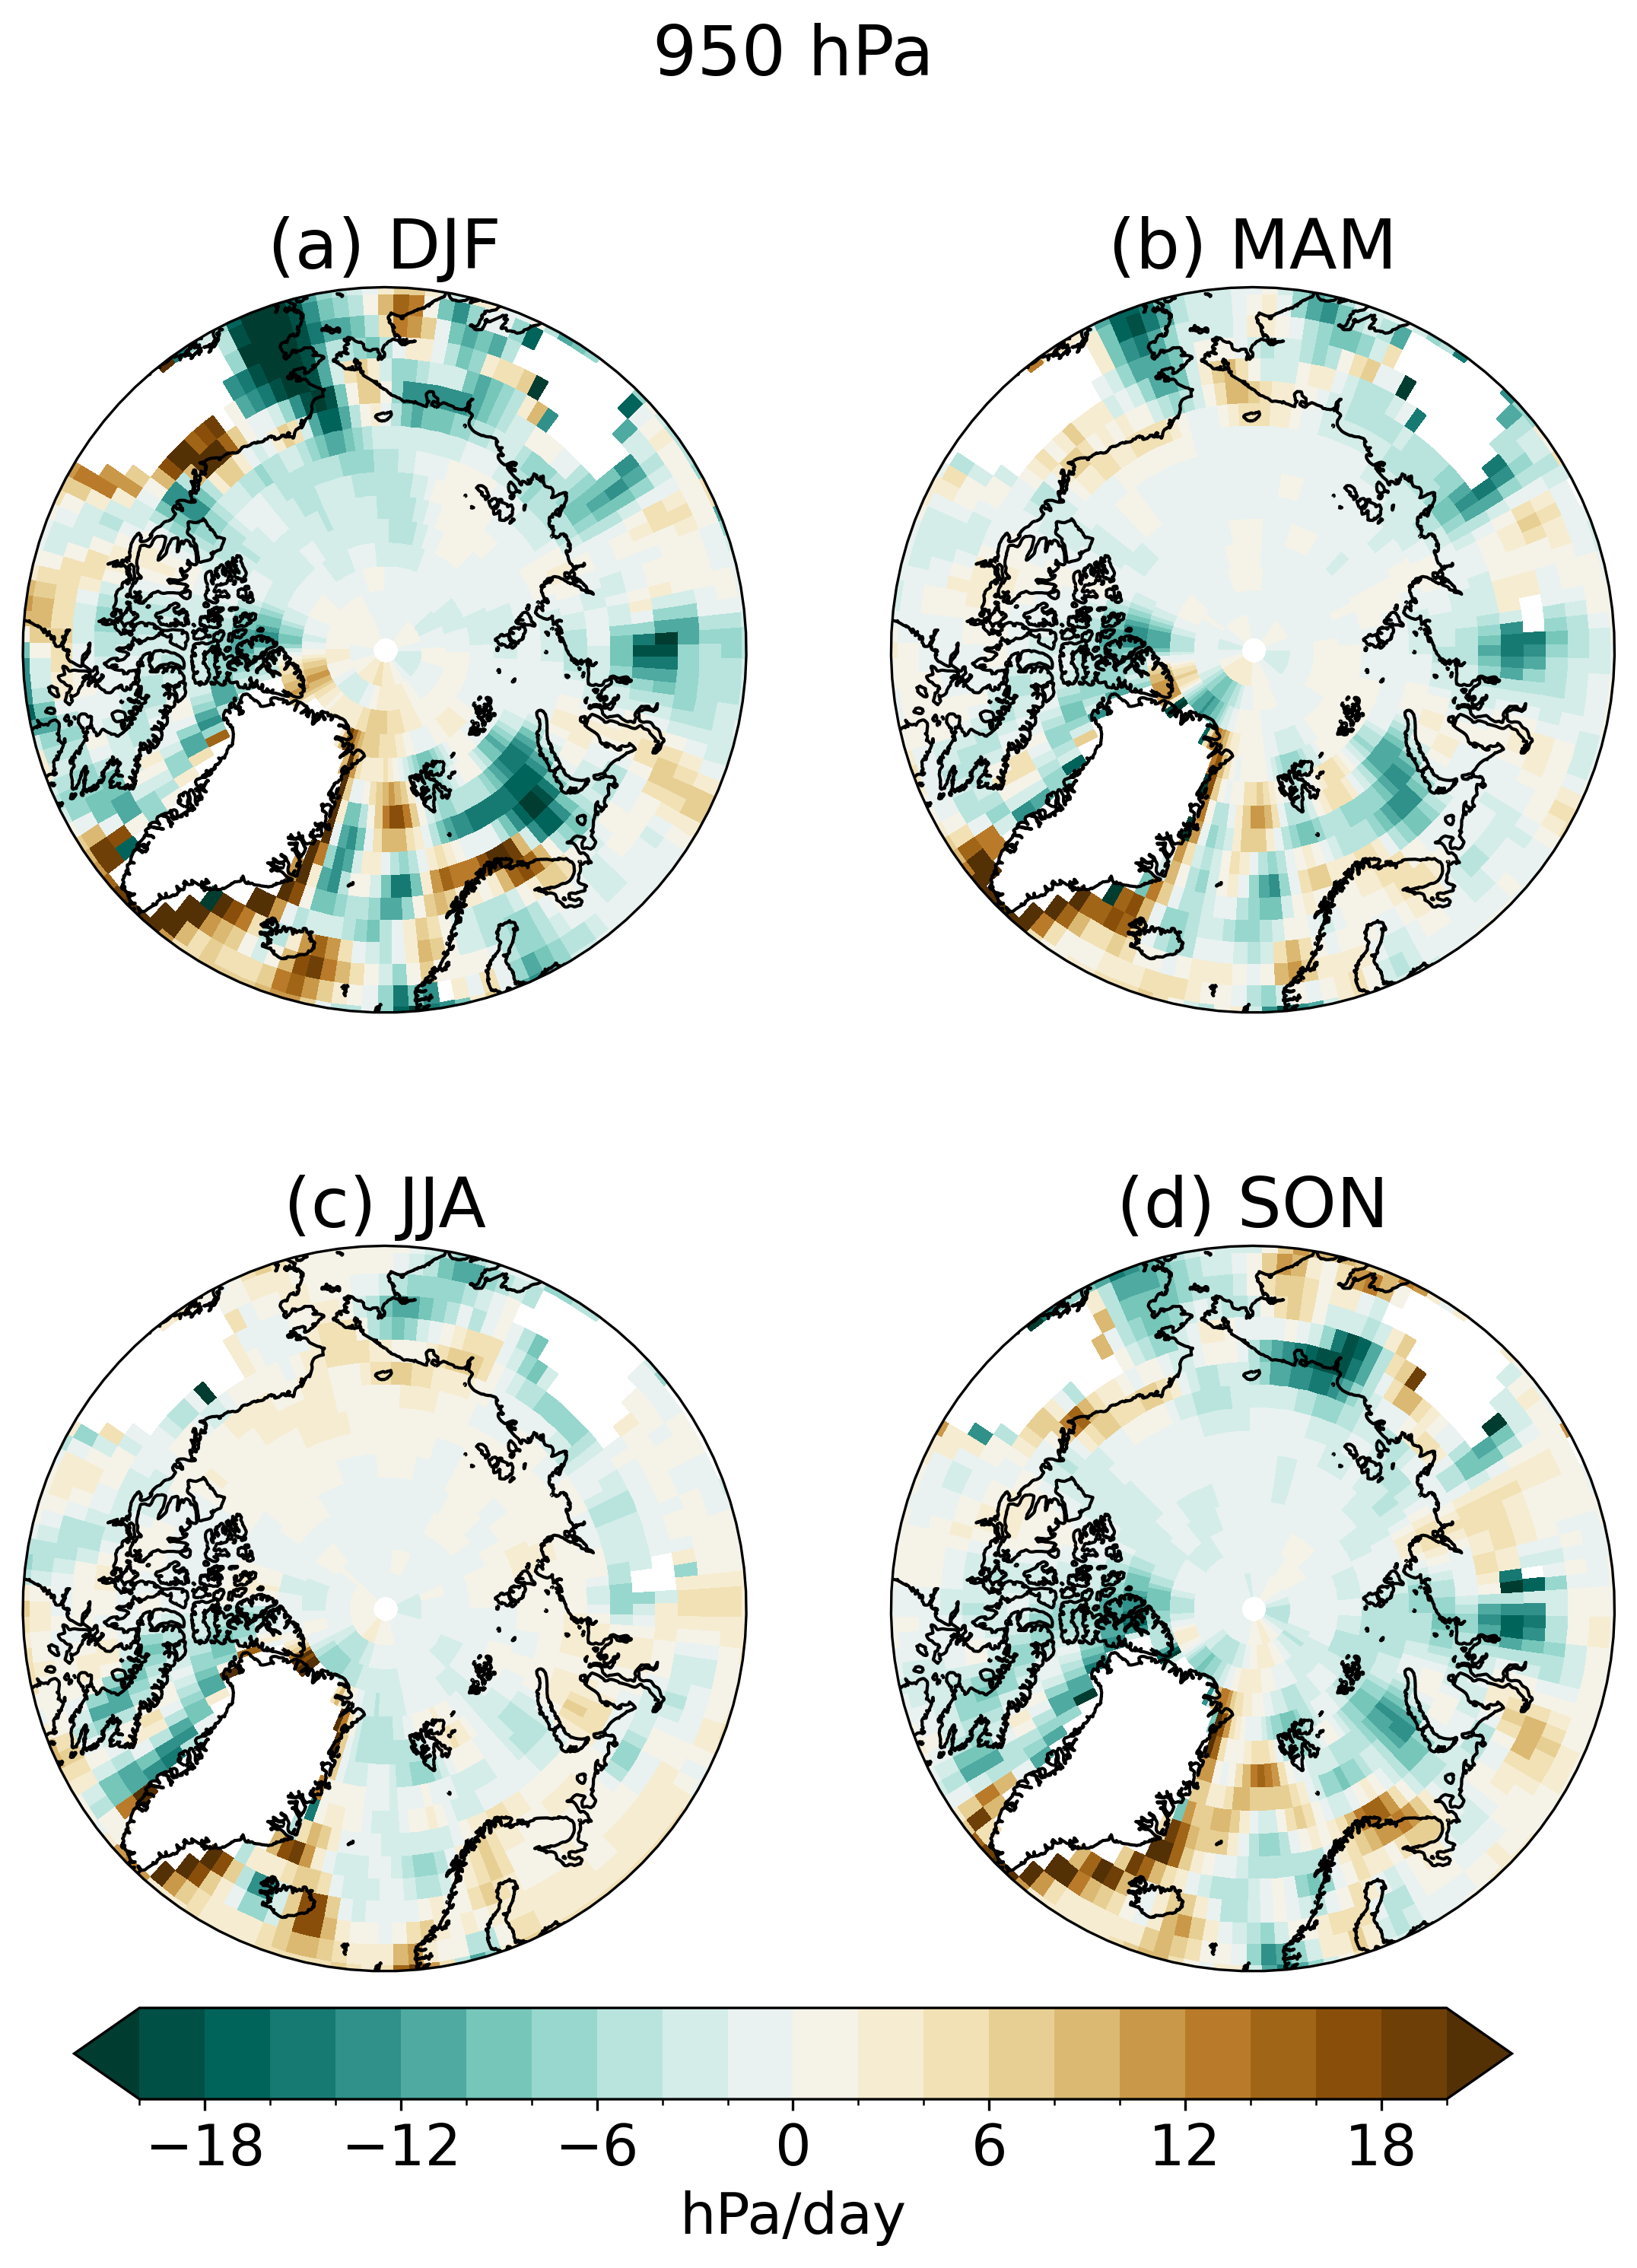

In [8]:
var = "OMEGA"
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)

regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

plev = 950
lim = 20
levels = np.linspace(-lim, lim, 21)
#levels = 21
unit = 'hPa/day'

regridded_piClim_height = regridded_piClim.sel(plev=plev, method='nearest')
regridded_4xCO2_height = regridded_4xCO2.sel(plev=plev, method='nearest')
regridded_piClim_height = regridded_piClim_height.groupby(regridded_piClim_height.time.dt.season).mean('time')
regridded_4xCO2_height = regridded_4xCO2_height.groupby(regridded_4xCO2_height.time.dt.season).mean('time')

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([60,90], ax)
    data = regridded_4xCO2_height[var].sel(season=season) - regridded_piClim_height[var].sel(season=season)
    data = data*60*60*24/100
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='BrBG_r', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)


Text(0.5, 0, 'm')

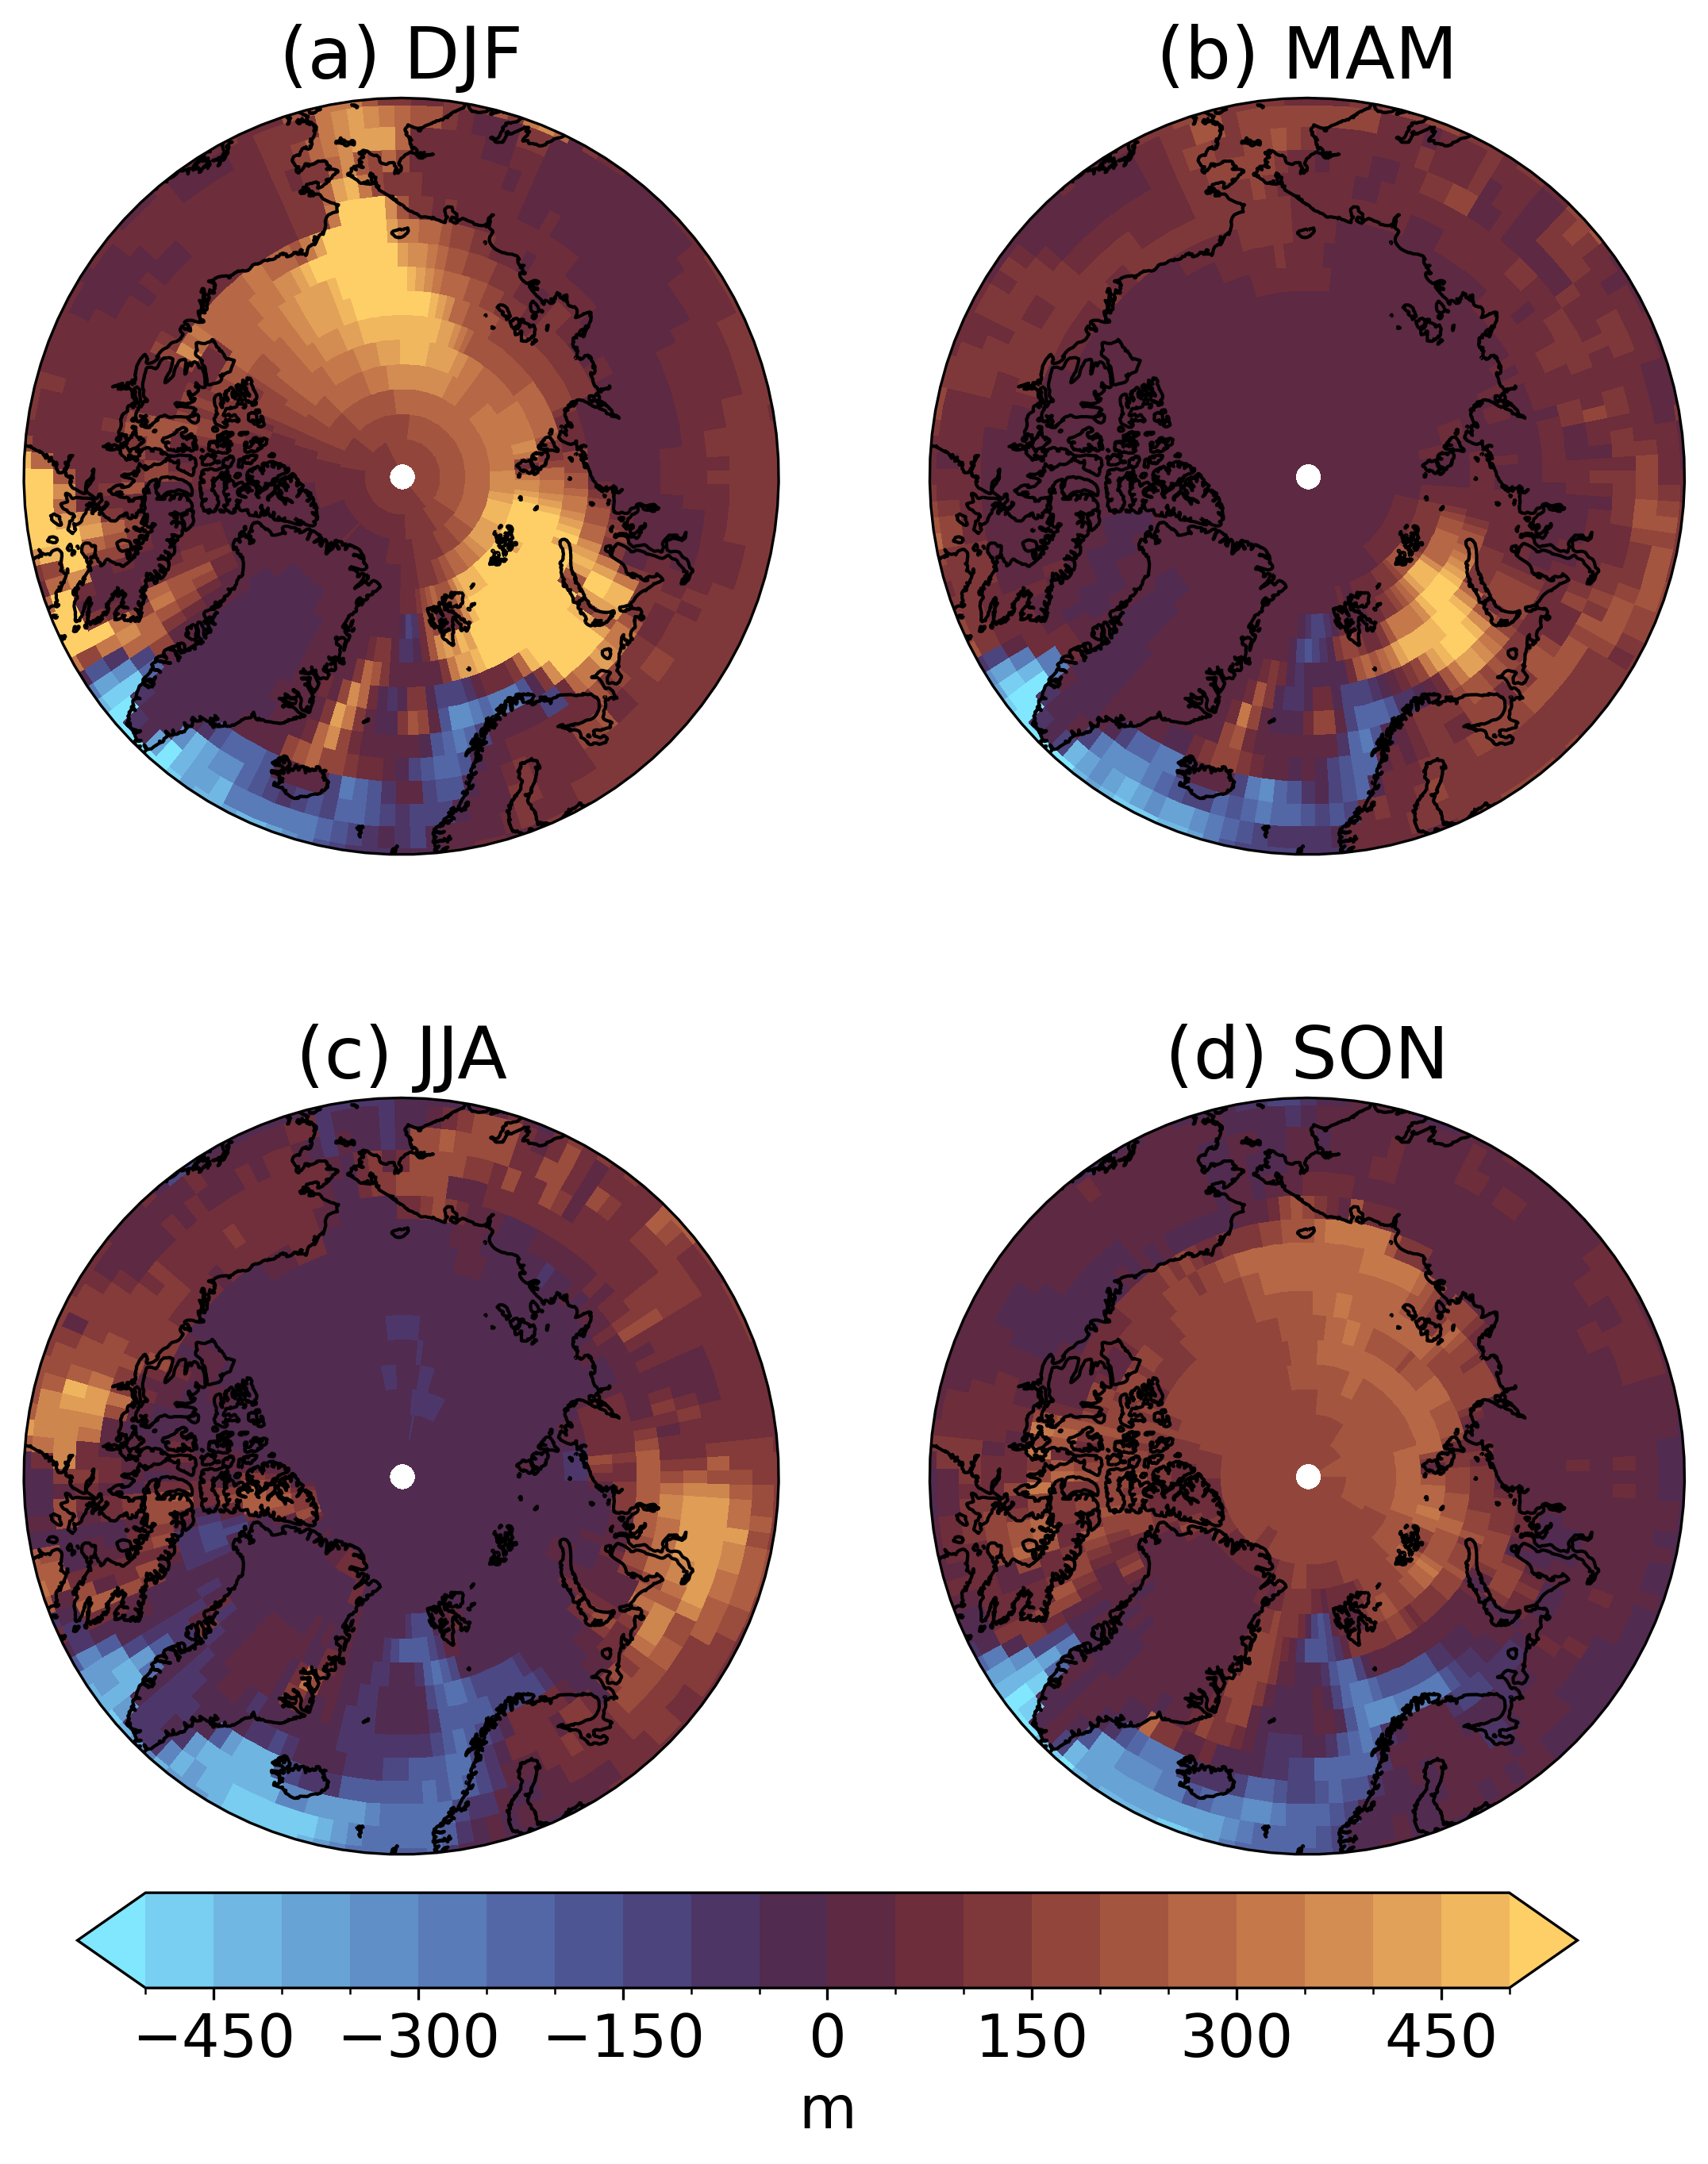

In [21]:
var = "PBLH"
tslice = slice('2040-01-01', '2069-12-31')
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)
lim = 500
levels = np.linspace(-lim, lim, 21)
unit = 'm'

ds_piClim_season = ds_slice_piClim.groupby(ds_slice_piClim.time.dt.season).mean('time')
ds_4xCO2_season = ds_slice_4xCO2.groupby(ds_slice_4xCO2.time.dt.season).mean('time')

fig = plt.figure(1, figsize=[9,10],dpi=300)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([60,90], ax)
    data = ds_4xCO2_season[var].sel(season=season) - ds_piClim_season[var].sel(season=season)
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='managua_r', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)


In [4]:
tslice = slice('2040-01-01', '2069-12-31')
plev = 300
ds_slice_piClim = ds_piClim.sel(time=tslice)
ds_slice_4xCO2 = ds_4xCO2.sel(time=tslice)

var = "U"
U_regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
U_regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

var = "V"
V_regridded_piClim = functions.regrid_to_pressure(ds_slice_piClim,var)
V_regridded_4xCO2 = functions.regrid_to_pressure(ds_slice_4xCO2,var)

U_regridded_piClim_season = U_regridded_piClim.groupby(U_regridded_piClim.time.dt.season).mean('time')
U_regridded_4xCO2_season = U_regridded_4xCO2.groupby(U_regridded_4xCO2.time.dt.season).mean('time')

V_regridded_piClim_season = V_regridded_piClim.groupby(V_regridded_piClim.time.dt.season).mean('time')
V_regridded_4xCO2_season = V_regridded_4xCO2.groupby(V_regridded_4xCO2.time.dt.season).mean('time')



In regrid_to_pressure atf.function. Regridding U to pressure levels
In regrid_to_pressure atf.function. Regridding U to pressure levels
In regrid_to_pressure atf.function. Regridding V to pressure levels
In regrid_to_pressure atf.function. Regridding V to pressure levels


Text(0.5, 0, 'm/s')

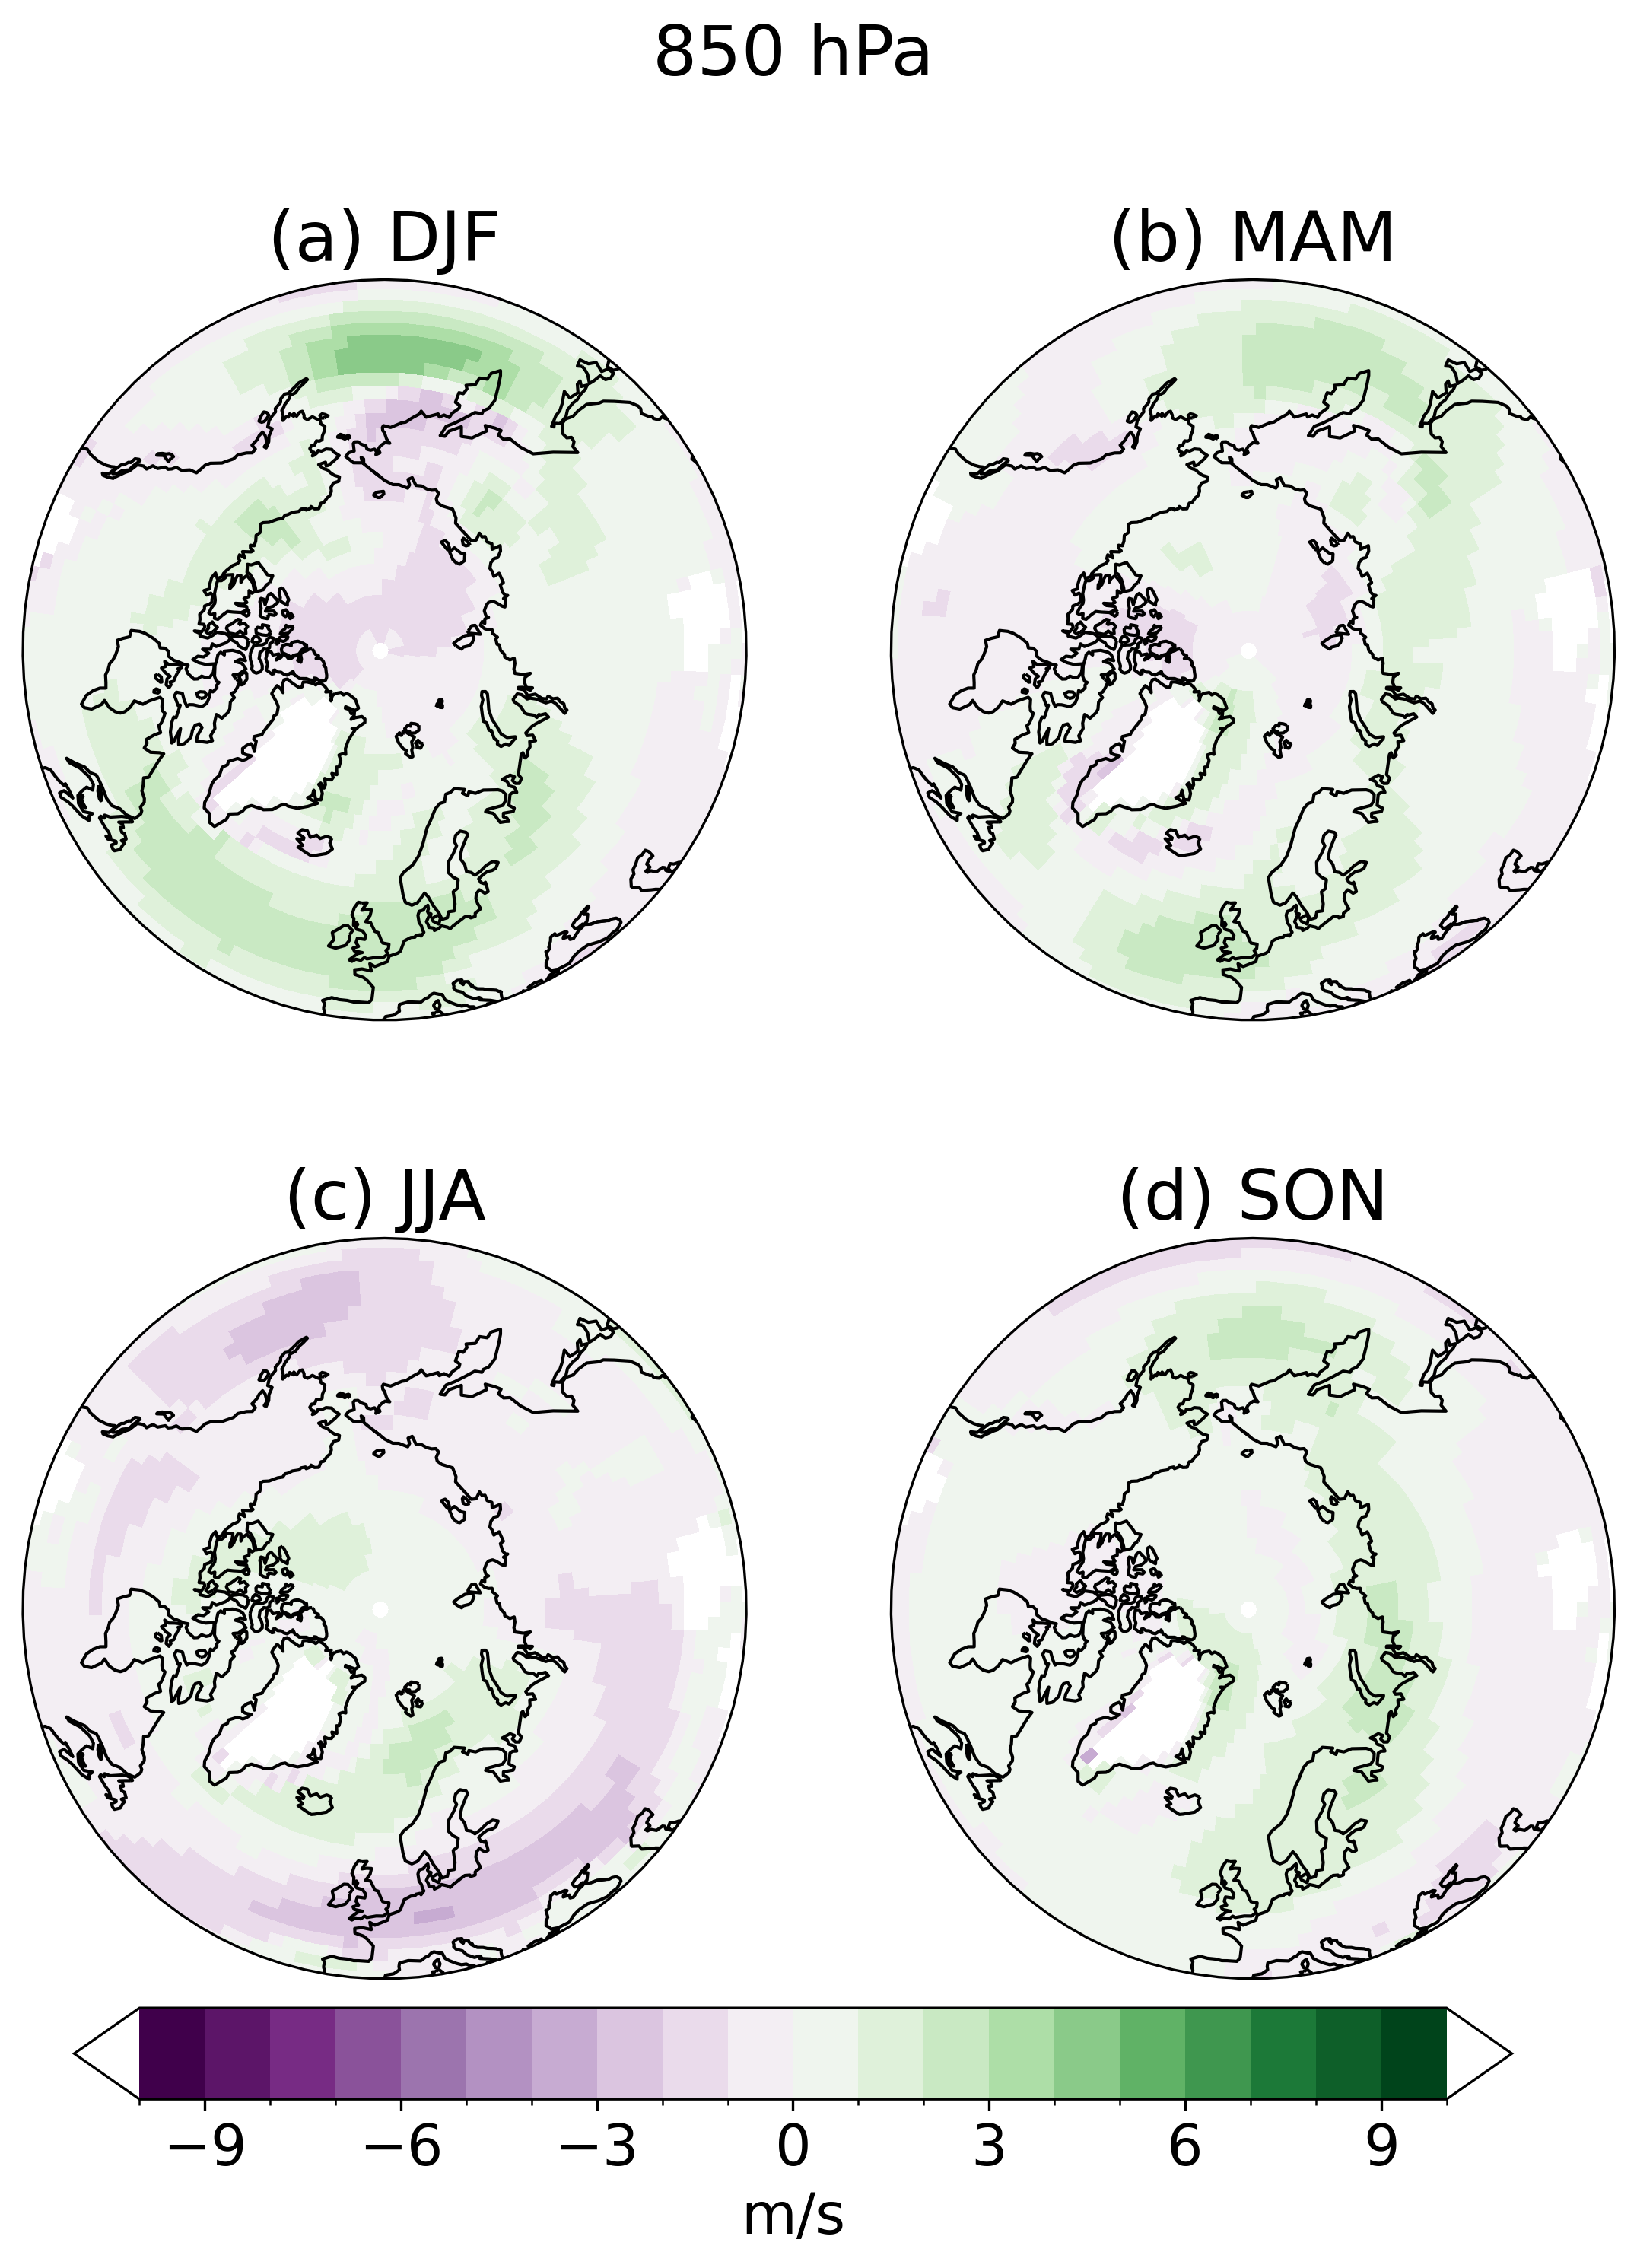

In [18]:
plev = 850
lim = 10
levels = np.linspace(-lim, lim, 21)
unit = 'm/s'

U_piClim_season = U_regridded_piClim_season.sel(plev=plev, method='nearest')
V_piClim_season = V_regridded_piClim_season.sel(plev=plev, method='nearest')
U_4xCO2_season = U_regridded_4xCO2_season.sel(plev=plev, method='nearest')
V_4xCO2_season = V_regridded_4xCO2_season.sel(plev=plev, method='nearest')
U_piClim_season['wind_speed'] = np.sqrt(U_piClim_season["U"]**2 + V_piClim_season["V"]**2)
U_4xCO2_season['wind_speed'] = np.sqrt(U_4xCO2_season["U"]**2 + V_4xCO2_season["V"]**2)

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([40,90], ax)
    data = U_4xCO2_season['wind_speed'].sel(season=season) - U_piClim_season['wind_speed'].sel(season=season) 
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)

Text(0.5, 0, 'm/s')

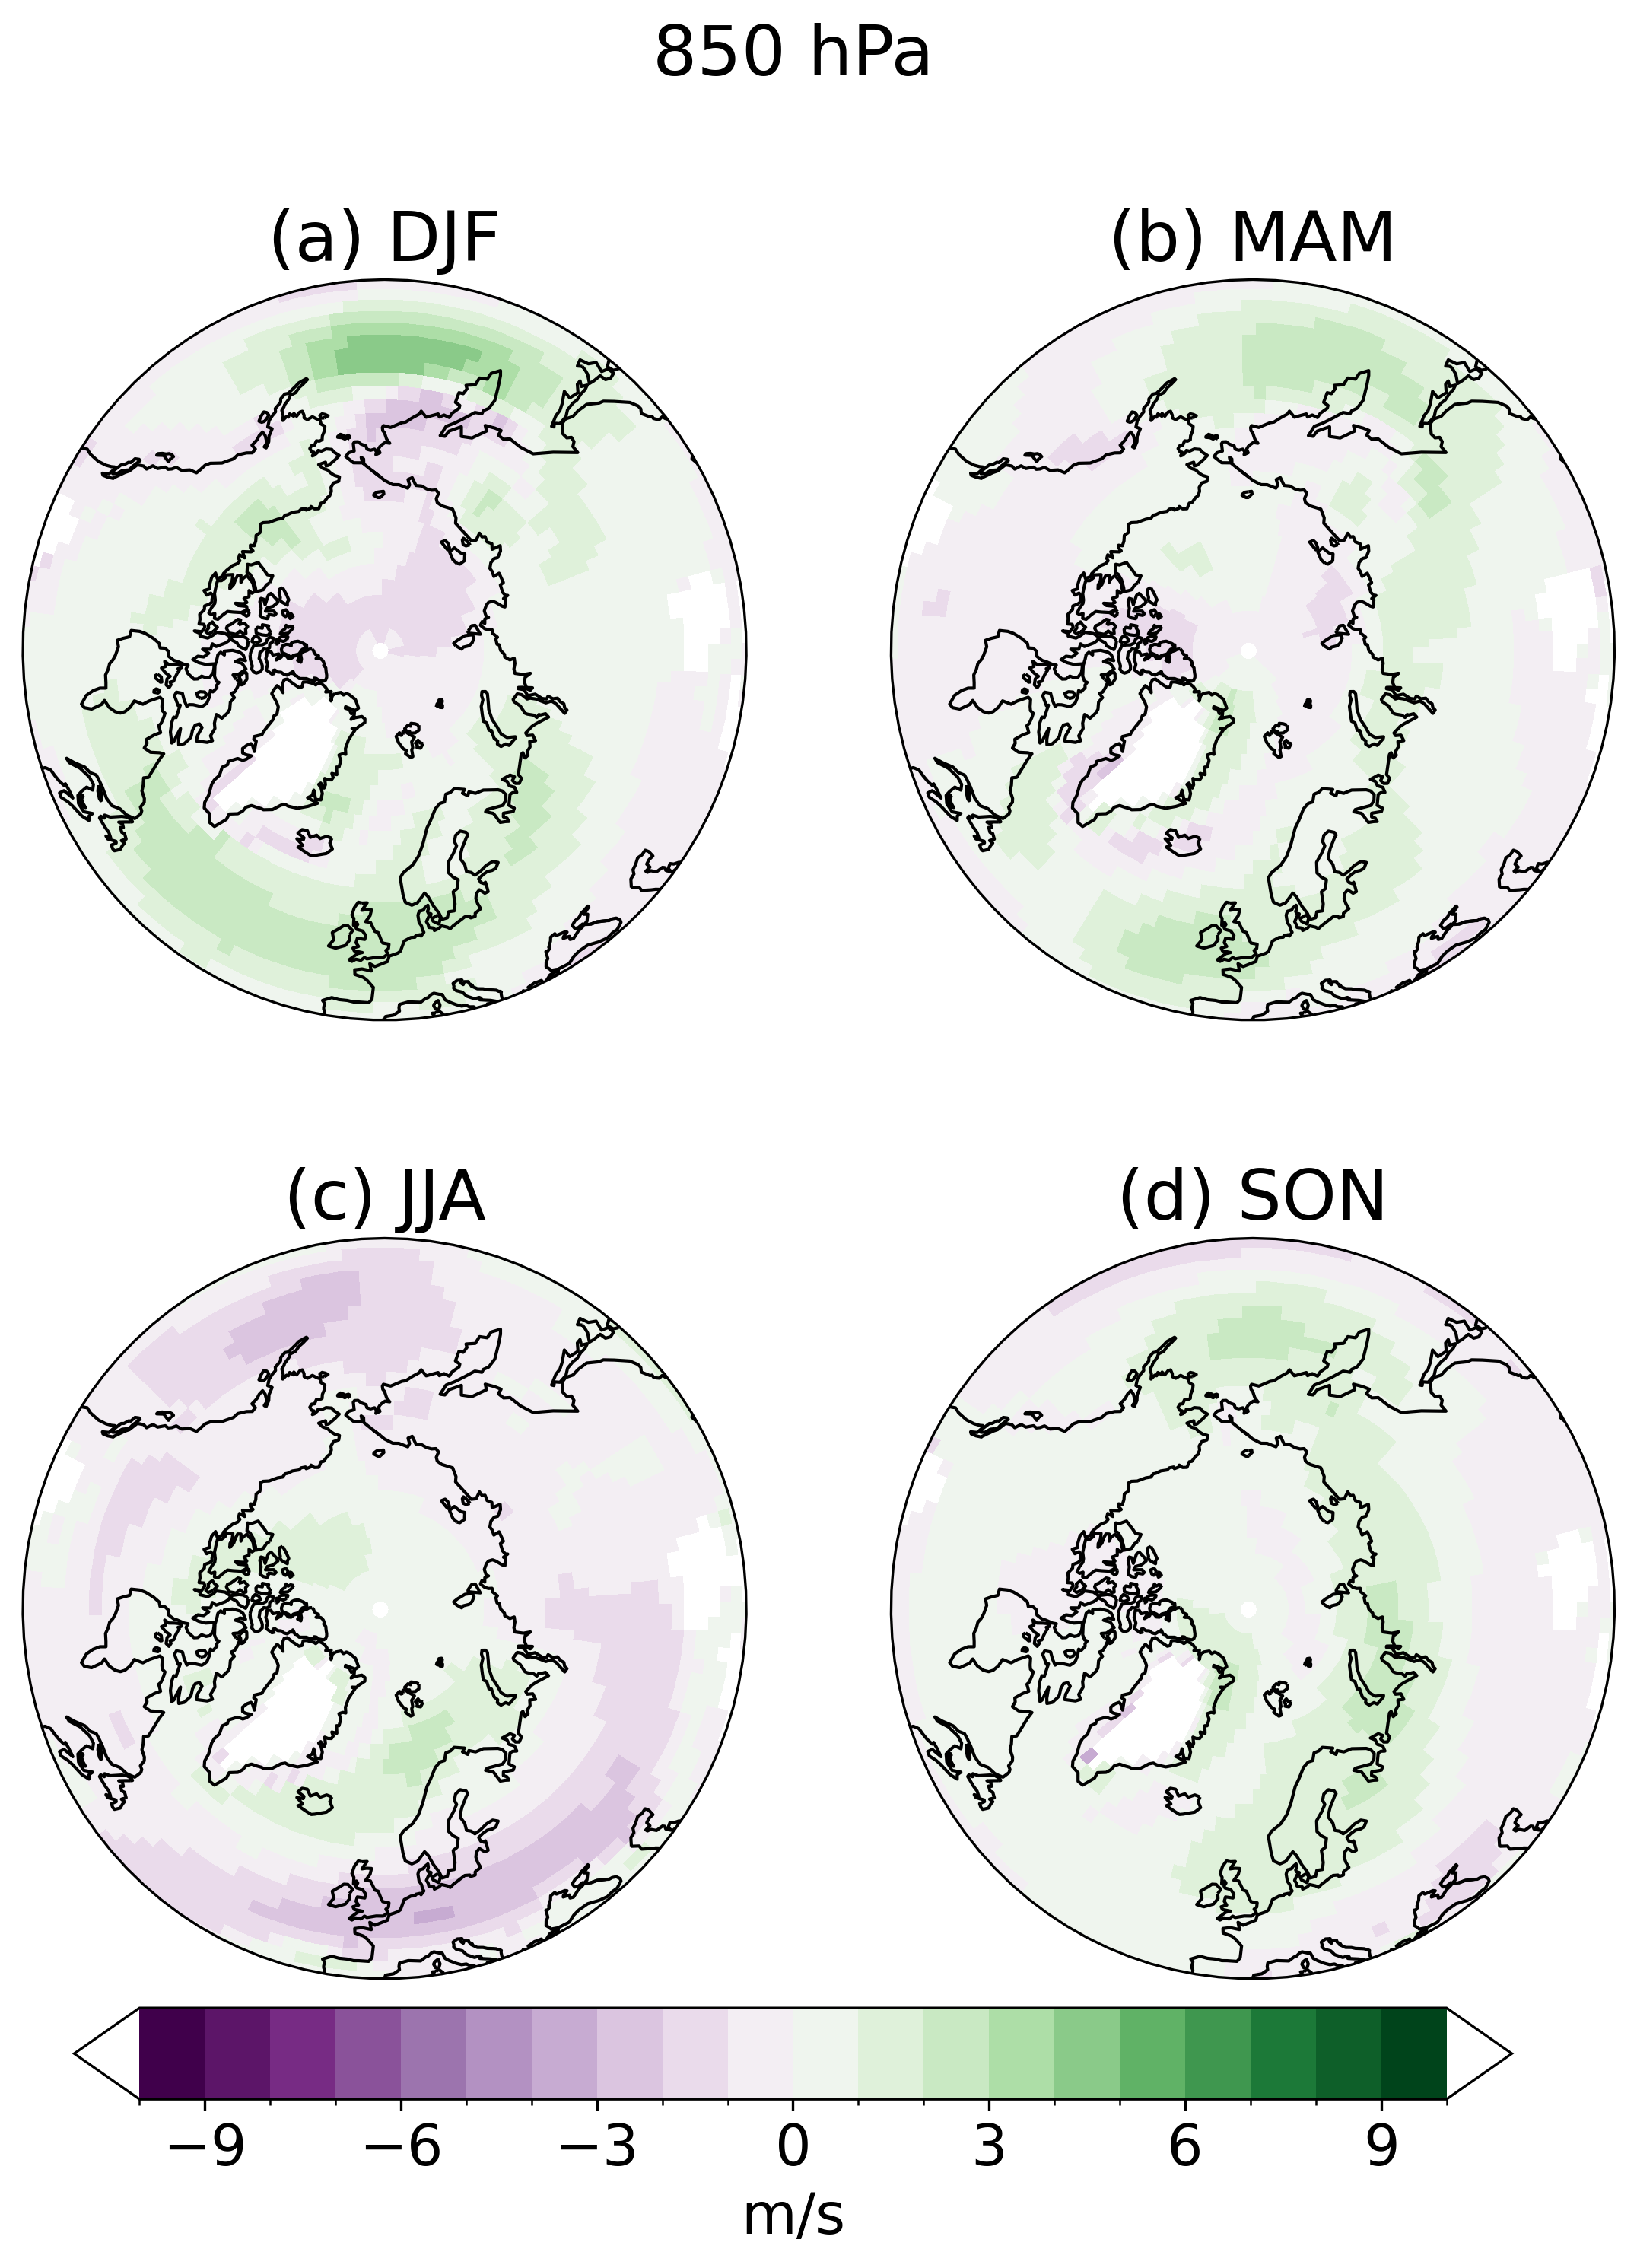

In [10]:
plev = 850
lim = 10
levels = np.linspace(-lim, lim, 21)
unit = 'm/s'

U_piClim_season = U_regridded_piClim_season.sel(plev=plev, method='nearest')
V_piClim_season = V_regridded_piClim_season.sel(plev=plev, method='nearest')
U_4xCO2_season = U_regridded_4xCO2_season.sel(plev=plev, method='nearest')
V_4xCO2_season = V_regridded_4xCO2_season.sel(plev=plev, method='nearest')
U_piClim_season['wind_speed'] = np.sqrt(U_piClim_season["U"]**2 + V_piClim_season["V"]**2)
U_4xCO2_season['wind_speed'] = np.sqrt(U_4xCO2_season["U"]**2 + V_4xCO2_season["V"]**2)

fig = plt.figure(1, figsize=[9,10],dpi=300)
fig.suptitle(str(plev)+' hPa', fontsize=22)

# Set the projection to use for plotting
ax1 = plt.subplot(2, 2, 1, projection=ccrs.Orthographic(0, 90))
ax2 = plt.subplot(2, 2, 2, projection=ccrs.Orthographic(0, 90))
ax3 = plt.subplot(2, 2, 3, projection=ccrs.Orthographic(0, 90))
ax4 = plt.subplot(2, 2, 4, projection=ccrs.Orthographic(0, 90))
#plt.subplots_adjust(top=0.85)

for ax,season,label in zip([ax1, ax2, ax3, ax4], ["DJF", "MAM","JJA","SON"], ["(a)", "(b)", "(c)", "(d)"]):

    functions.polarCentral_set_latlim([40,90], ax)
    data = U_4xCO2_season['wind_speed'].sel(season=season) - U_piClim_season['wind_speed'].sel(season=season) 
    data = data
    map = data.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), 
                                        cmap='PRGn', levels=levels,
                                        add_colorbar=False)
    ax.set_title(label+" "+season, fontsize=22)
    ax.coastlines()


cb_ax = fig.add_axes([0.15, 0.07, 0.7, 0.04])

cbar = plt.colorbar(map, cax=cb_ax, spacing = 'uniform', extend='both', orientation='horizontal', fraction=0.046, pad=0.06)
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_xlabel(unit, fontsize=18)